# Set up paths

In [1]:
# Specify the lib path
lib_path<-paste(getwd(),'/hana_reanalysis_lib_r42',sep='')
print(lib_path)

# Set the path
.libPaths(lib_path)
.libPaths()

#Set the vis device
setHook(packageEvent("grDevices", "onLoad"),
function(...) grDevices::X11.options(type='cairo'))
options(device='x11')

[1] "/v-data2/matt_davenport/HaNa_RE/HaNa_Reanalysis/hana_reanalysis_lib_r42"


[1] "/v-data2/matt_davenport/HaNa_RE/HaNa_Reanalysis/hana_reanalysis_lib_r42"
[2] "/home/mdavenport/bin/R4.2.1/R-4.2.1/library"

# 8 - Chromosomal enrichments

## First lets just look at the data and see if any chromosome module pairings stand out

In [2]:
library(tidyverse)
library(ggpubr)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
library(rtracklayer)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:tidyr’:

    expand


T

## Read in module memberships

In [4]:
g_members <- readRDS('4_mod_membership_all_genes_broken_out.rds') %>% filter(me_assigned != 'X') %>% 
    filter(me_assigned!='X')
head(g_members)

A,B,C,D,E,F,G,H,I,J,K,L,gene_id,me_assigned
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
0.18255477,0.105074503,-0.1035008,-0.06411247,-0.08134665,-0.11286581,0.10047994,-0.04726497,-0.11964807,0.502134986,0.05178730,0.09712287,A4GNT,J
-0.17604402,-0.363890875,0.3374319,0.76031742,0.05085780,-0.32600792,-0.07671473,-0.15493875,-0.06018514,0.159801979,0.14182718,-0.10599198,AAAS,D
-0.72859604,0.262449312,0.2932145,0.02052947,0.04168985,0.03217099,0.27472125,-0.06501581,-0.13804126,-0.048177245,0.07641915,-0.04250240,AACS,A
0.48364563,0.024091951,-0.1001766,-0.22604469,0.06294843,0.01971683,0.01913709,-0.20109345,0.11181887,-0.002727155,0.02030565,0.34149315,AADAT,A
0.01863412,0.409190859,-0.4492995,-0.13857346,-0.08101929,0.09707536,-0.28600584,-0.20992131,-0.20058582,0.065879347,0.20920317,0.07655823,AAGAB,C
-0.48033843,-0.006378666,0.1341566,0.49253625,-0.05265697,0.20980327,0.54197706,-0.28248395,-0.19184857,0.074422347,0.06672888,-0.02867832,AAK1,A


## Read in the genome annotation, really just need the gene_ids 

In [5]:
annot <- rtracklayer::import('/v-data2/matt_davenport/hana_reanalyses/hana_cm_formatted/genome/GCF_008822105.2_bTaeGut2.pat.W.v2_genomic.purged2.gtf') %>%
            as_tibble %>% 
            filter(type=='gene') %>% dplyr::select(one_of(c('gene_id','start', 'seqnames'))) %>% arrange(start) %>%
            mutate(chr=seqnames) %>% mutate(seqnames=NULL)
head(annot)

gene_id,start,chr
<chr>,<int>,<fct>
DCAF8,4,NW_022611518.1
PES1,4,NW_022611617.1
LOC116806624,5,NC_045025.1
MCL1,5,NW_022611516.1
LOC115492023,5,NW_022611588.1
SMTNL2,6,NC_045017.1


In [6]:
g_mem <- left_join(g_members,annot,by='gene_id') %>% arrange(start) %>% mutate(chr=chr %>% as.character) 
head(g_mem)

A,B,C,D,E,F,G,H,I,J,K,L,gene_id,me_assigned,start,chr
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<int>,<chr>
-0.13485961,-0.1478109,0.08248128,0.7401402,0.003129817,-0.2450172,-0.065342078,-0.45370507,-0.12457305,-0.007972496,-0.15841958,-0.13160382,DCAF8,D,4,NW_022611518.1
-0.09802066,-0.1863832,0.12490708,0.7545798,0.008101006,-0.2536853,-0.056526383,-0.33152923,-0.19684808,0.352842072,-0.06807214,0.10320242,PES1,D,4,NW_022611617.1
0.09017291,-0.3392133,0.26020092,0.3211993,0.046204014,-0.1779789,-0.003168965,-0.02859499,0.02223885,-0.199103093,0.25364736,-0.11569826,LOC115492023,B,5,NW_022611588.1
-0.14723479,0.1472913,-0.10926991,0.3604447,-0.047515393,-0.2010019,-0.099649466,-0.36019090,-0.17268375,0.142467285,-0.11281332,-0.19860203,LOC116806624,D,5,NC_045025.1
-0.27157146,-0.2707146,0.41180841,0.7097909,0.018589051,-0.1766464,0.028829257,-0.35489696,0.17134890,-0.153515833,-0.21826963,0.04953013,MCL1,D,5,NW_022611516.1
-0.22886269,-0.4069783,0.79293854,0.2422692,0.157075508,-0.1936427,0.124614225,0.22677265,0.25493495,0.024035013,0.25773665,0.06474027,CLU,C,6,NW_022611502.1


In [7]:
g_mem$chr[which(grepl('NW_', g_mem$chr))] <- 'NW_xxxxxx.x'

g_mem <- g_mem %>% arrange(chr,start) %>% 
                mutate(chr=factor(chr,levels=unique(chr))) %>% group_by(chr)
head(g_mem)
unique(g_mem$chr)

A,B,C,D,E,F,G,H,I,J,K,L,gene_id,me_assigned,start,chr
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<int>,<fct>
0.39422399,-0.2499023,0.225621005,-0.346182823,0.20616580,0.03679341,0.05925243,0.27184684,0.198335813,0.12107126,0.1147021,0.009169469,LOC100221041,A,14582,NC_044998.1
0.28265351,-0.2083162,0.465529118,-0.003400538,0.21768924,-0.30496202,0.06885775,-0.01863200,0.023827570,-0.04357108,0.2267542,0.123181034,DCBLD2,C,31388,NC_044998.1
-0.32073822,0.3103762,0.320234958,0.024034211,-0.05994874,-0.36802577,0.27683494,-0.05191262,-0.284671000,-0.10477477,0.2441933,-0.061928728,FILIP1L,B,112495,NC_044998.1
-0.02242119,-0.1231827,0.469964532,-0.047932702,0.01403775,-0.25329369,0.08269483,0.14972953,-0.001383198,-0.05953356,0.2714866,0.001691121,LOC116808959,C,287349,NC_044998.1
0.18919989,0.2346202,0.107951972,-0.427524268,-0.02758211,0.03149758,0.17734305,0.03931830,0.010680493,0.53132033,0.1122785,0.204667124,TBC1D23,D,300404,NC_044998.1
0.24260539,0.2502822,-0.005785068,-0.425673516,-0.37250815,-0.05573657,0.16908628,0.33069291,0.069305748,0.27262140,-0.1121389,0.038339426,NIT2,E,333622,NC_044998.1


[1] NC_044998.1 NC_044999.1 NC_045000.1 NC_045001.1 NC_045002.1 NC_045003.1
 [7] NC_045004.1 NC_045005.1 NC_045006.1 NC_045007.1 NC_045008.1 NC_045009.1
[13] NC_045010.1 NC_045011.1 NC_045012.1 NC_045013.1 NC_045014.1 NC_045015.1
[19] NC_045016.1 NC_045017.1 NC_045018.1 NC_045019.1 NC_045020.1 NC_045021.1
[25] NC_045022.1 NC_045023.1 NC_045024.1 NC_045025.1 NC_045026.1 NC_045027.1
[31] NC_045028.1 NC_045955.1 NW_xxxxxx.x
33 Levels: NC_044998.1 NC_044999.1 NC_045000.1 NC_045001.1 ... NW_xxxxxx.x

In [8]:
write.csv(g_mem,'g_mem.csv')

### And lets look at these genes in the newest assembly

In [9]:
newer_annot <- rtracklayer::import('/v-data2/matt_davenport/HaNa_RE/HaNa_Reanalysis//GCF_003957565.2_bTaeGut1.4.pri_genomic.gtf') %>%
            as_tibble %>% 
            filter(type=='gene') %>% dplyr::select(one_of(c('gene_id','start', 'seqnames'))) %>% arrange(start) %>%
            mutate(new_chr=seqnames) %>% mutate(seqnames=NULL)
head(newer_annot)

gene_id,start,new_chr
<chr>,<int>,<fct>
LOC121469010,1,NW_024545390.1
LOC121469017,2,NW_024545398.1
LOC121468954,5,NW_024545337.1
LOC115492522,6,NW_024545418.1
LOC116807381,7,NW_024545350.1
LOC121469057,7,NW_024545446.1


In [10]:
chr_convert_tbl <-g_mem %>% dplyr::select(c(gene_id,me_assigned,chr))
chr_convert_tbl <- chr_convert_tbl %>% filter(gene_id %in% newer_annot$gene_id) %>% left_join(newer_annot,by='gene_id')
chr_convert_tbl <- chr_convert_tbl %>% mutate(new_chr = new_chr %>% as.character)

In [11]:
head(chr_convert_tbl)

gene_id,me_assigned,chr,start,new_chr
<chr>,<fct>,<fct>,<int>,<chr>
LOC100221041,A,NC_044998.1,25416,NC_044211.2
DCBLD2,C,NC_044998.1,34796,NC_044211.2
FILIP1L,B,NC_044998.1,115947,NC_044211.2
TBC1D23,D,NC_044998.1,303818,NC_044211.2
NIT2,E,NC_044998.1,336891,NC_044211.2
TMEM45A,A,NC_044998.1,396488,NC_044211.2


In [12]:
chr_convert_tbl$new_chr[which(grepl('NW_', chr_convert_tbl$new_chr))] <- 'NW_xxxxxx.x'

chr_convert_tbl <- chr_convert_tbl %>% arrange(new_chr,start) %>% 
                mutate(new_chr=factor(new_chr,levels=unique(new_chr))) %>% group_by(new_chr)


# Produced in python

In [13]:
new_enrich = read.csv('remapped_enrich.csv') %>% as_tibble()
old_enrich = read.csv('old_enrich.csv') %>% as_tibble()

In [14]:
library(curl)
url = "https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003/957/565/GCF_003957565.2_bTaeGut1.4.pri/GCF_003957565.2_bTaeGut1.4.pri_assembly_structure/Primary_Assembly/assembled_chromosomes/chr2acc"
h = new_handle(dirlistonly=TRUE)
con = curl(url, "r", h)
chrNames_tbl = read.table(con, stringsAsFactors=FALSE, fill=TRUE)
close(con)

colnames(chrNames_tbl)<- c('chr_name','chr')
chrNames_tbl[nrow(chrNames_tbl) + 1,] = c("other",'NW_xxxxxx.x')

new_enrich_mut <- new_enrich %>% mutate('chr'=new_chr) %>% left_join(chrNames_tbl,by='chr') %>% 
    mutate('q' = p.adjust(p,method='fdr')) %>% 
    mutate('pBH' = p.adjust(p,method='BH')) %>% 
    mutate('pBonf' = p*33*12) %>% 
    mutate(chr_name = as.factor(chr_name)) %>% 
    mutate(chr_name = fct_relevel(chr_name,
                                  '1','1A','2','3','4','4A','5','6','7','8','9','10',
                                  '11','12','13','14','15','16','17','18','19','20',
                                  '21','22','23','24','25','26','27','28','29','30',
                                  '31','32','33','34','35','36','37','Z','W','other')) %>% 
    mutate('is_sig' = q <=0.05)



Using libcurl 7.81.0 with OpenSSL/3.0.2


Attaching package: ‘curl’


The following object is masked from ‘package:readr’:

    parse_date




In [15]:
new_enrich_bar_tbl <- chr_convert_tbl %>% mutate('chr'=new_chr) %>% left_join(chrNames_tbl,by='chr') %>%
    mutate(chr_name = as.factor(chr_name)) %>% 
    mutate(chr_name = fct_relevel(chr_name,
                                  '1','1A','2','3','4','4A','5','6','7','8','9','10',
                                  '11','12','13','14','15','16','17','18','19','20',
                                  '21','22','23','24','25','26','27','28','29','30',
                                  '31','32','33','34','35','36','37','Z','W','other'))

In [16]:
url = "https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/008/822/105/GCF_008822105.2_bTaeGut2.pat.W.v2/GCF_008822105.2_bTaeGut2.pat.W.v2_assembly_structure/Primary_Assembly/assembled_chromosomes/chr2acc"
h = new_handle(dirlistonly=TRUE)
con = curl(url, "r", h)
chrNames_tbl = read.table(con, stringsAsFactors=FALSE, fill=TRUE)
close(con)

colnames(chrNames_tbl)<- c('chr_name','chr')
chrNames_tbl[nrow(chrNames_tbl) + 1,] = c("other",'NW_xxxxxx.x')

old_enrich_mut <- old_enrich %>% left_join(chrNames_tbl,by='chr') %>% 
    mutate('q' = p.adjust(p,method='fdr')) %>% 
    mutate('pBH' = p.adjust(p,method='BH')) %>% 
    mutate('pBonf' = p*33*12) %>% 
    mutate(chr_name = as.factor(chr_name)) %>% 
    mutate(chr_name = fct_relevel(chr_name,
                                 '1','1A','2','3','4','4A','5','6','7','8','9','10',
                                 '11','12','13','14','15','17','18','19','20',
                                 '21','22','23','24','25','26','27','28','29','Z','W','other'))%>% 
    mutate('is_sig' = q<=0.05)



In [17]:
old_enrich_bar_tbl <- g_mem %>% left_join(chrNames_tbl,by='chr') %>%
    mutate(chr_name = as.factor(chr_name)) %>% 
    mutate(chr_name = fct_relevel(chr_name,
                                 '1','1A','2','3','4','4A','5','6','7','8','9','10',
                                 '11','12','13','14','15','17','18','19','20',
                                 '21','22','23','24','25','26','27','28','29','Z','W','other'))

In [18]:
options(repr.plot.width=15, repr.plot.height=15)
library(RColorBrewer)
library(ggpubr)

g_legend<-function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)}

enrich_plotter <- function(enrich_tbl,bar_tbl,n_genes,title){
        bubbles <- enrich_tbl %>% ggplot(aes(y = chr_name, x = observed_enrich, 
            fill = me_assigned, color = is_sig, size = (log10(observed_freq * 
                n_genes)))) + geom_vline(xintercept = 1, color = "black", 
            size = 3) + geom_point(data = enrich_tbl %>% filter(is_sig == 
            FALSE), shape = 21, stroke = 2, alpha = 0.75, show.legend = FALSE) + 
            geom_point(data = enrich_tbl %>% filter(is_sig == TRUE), 
                shape = 21, stroke = 2) + scale_size_continuous("# genes", 
            range = c(0, 10), breaks = c(0, 1, 2, 3), limits = c(0, 
                4), labels = c(1, 10, 100, 1000)) + scale_fill_brewer("Module", 
            palette = "Set3") + scale_color_manual("FDR\n<= 0.05", 
            values = c("grey", "black")) + theme_grey(base_size = 25) + 
            scale_x_continuous("Fold\nEnrichment") + scale_y_discrete("\nChromosome") + 
            guides(fill = guide_legend(override.aes = list(size = 10))) + 
            ggtitle(title)
    
        bubbles_lgnd <- g_legend(bubbles)
        bubbles <- bubbles + theme(legend.position='None')

        ratios <- bar_tbl %>% 
            ggplot(aes(y=chr_name,x=1,fill=me_assigned)) +
            geom_bar(position="fill", stat="identity")+ 
            scale_fill_brewer('Module',palette='Set3')+
            theme_grey(base_size=25)+
            theme(axis.text.x=element_text(colour = 'white'),
                  axis.text.y=element_blank(),
                  axis.ticks=element_blank(),
                  legend.position='none',panel.grid=element_blank()) + 
            xlab('Mod.\nRatios') + ylab('') + ggtitle('\n')

        sizes = bar_tbl %>% 
            ggplot(aes(y=chr_name,x=1)) +
            geom_bar(position="stack", stat="identity",fill='black')+ 
            scale_fill_brewer('Module',palette='Set3')+
            scale_x_continuous(breaks=c(0,500,1000),limits=c(0,1300))+
            theme_grey(base_size=25)+
            theme(axis.text.y=element_blank(),
                  axis.ticks=element_blank()) + 
            xlab('Mod. Assigned\nGenes') + ylab('') +
            theme(legend.position='none',panel.grid.minor=element_blank())+ ggtitle('\n')
    
        ggarrange(bubbles_lgnd,bubbles,ratios,sizes,widths = c(.5,2.5,1,1),nrow=1)
}

Warning message in sqrt(x):
“NaNs produced”
Warning message:
“Removed 86 rows containing missing values (geom_point).”
Warning message in sqrt(x):
“NaNs produced”
Warning message:
“Removed 86 rows containing missing values (geom_point).”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”
Warning message in sqrt(x):
“NaNs produced”
Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message in sqrt(x):
“NaNs produced”
Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


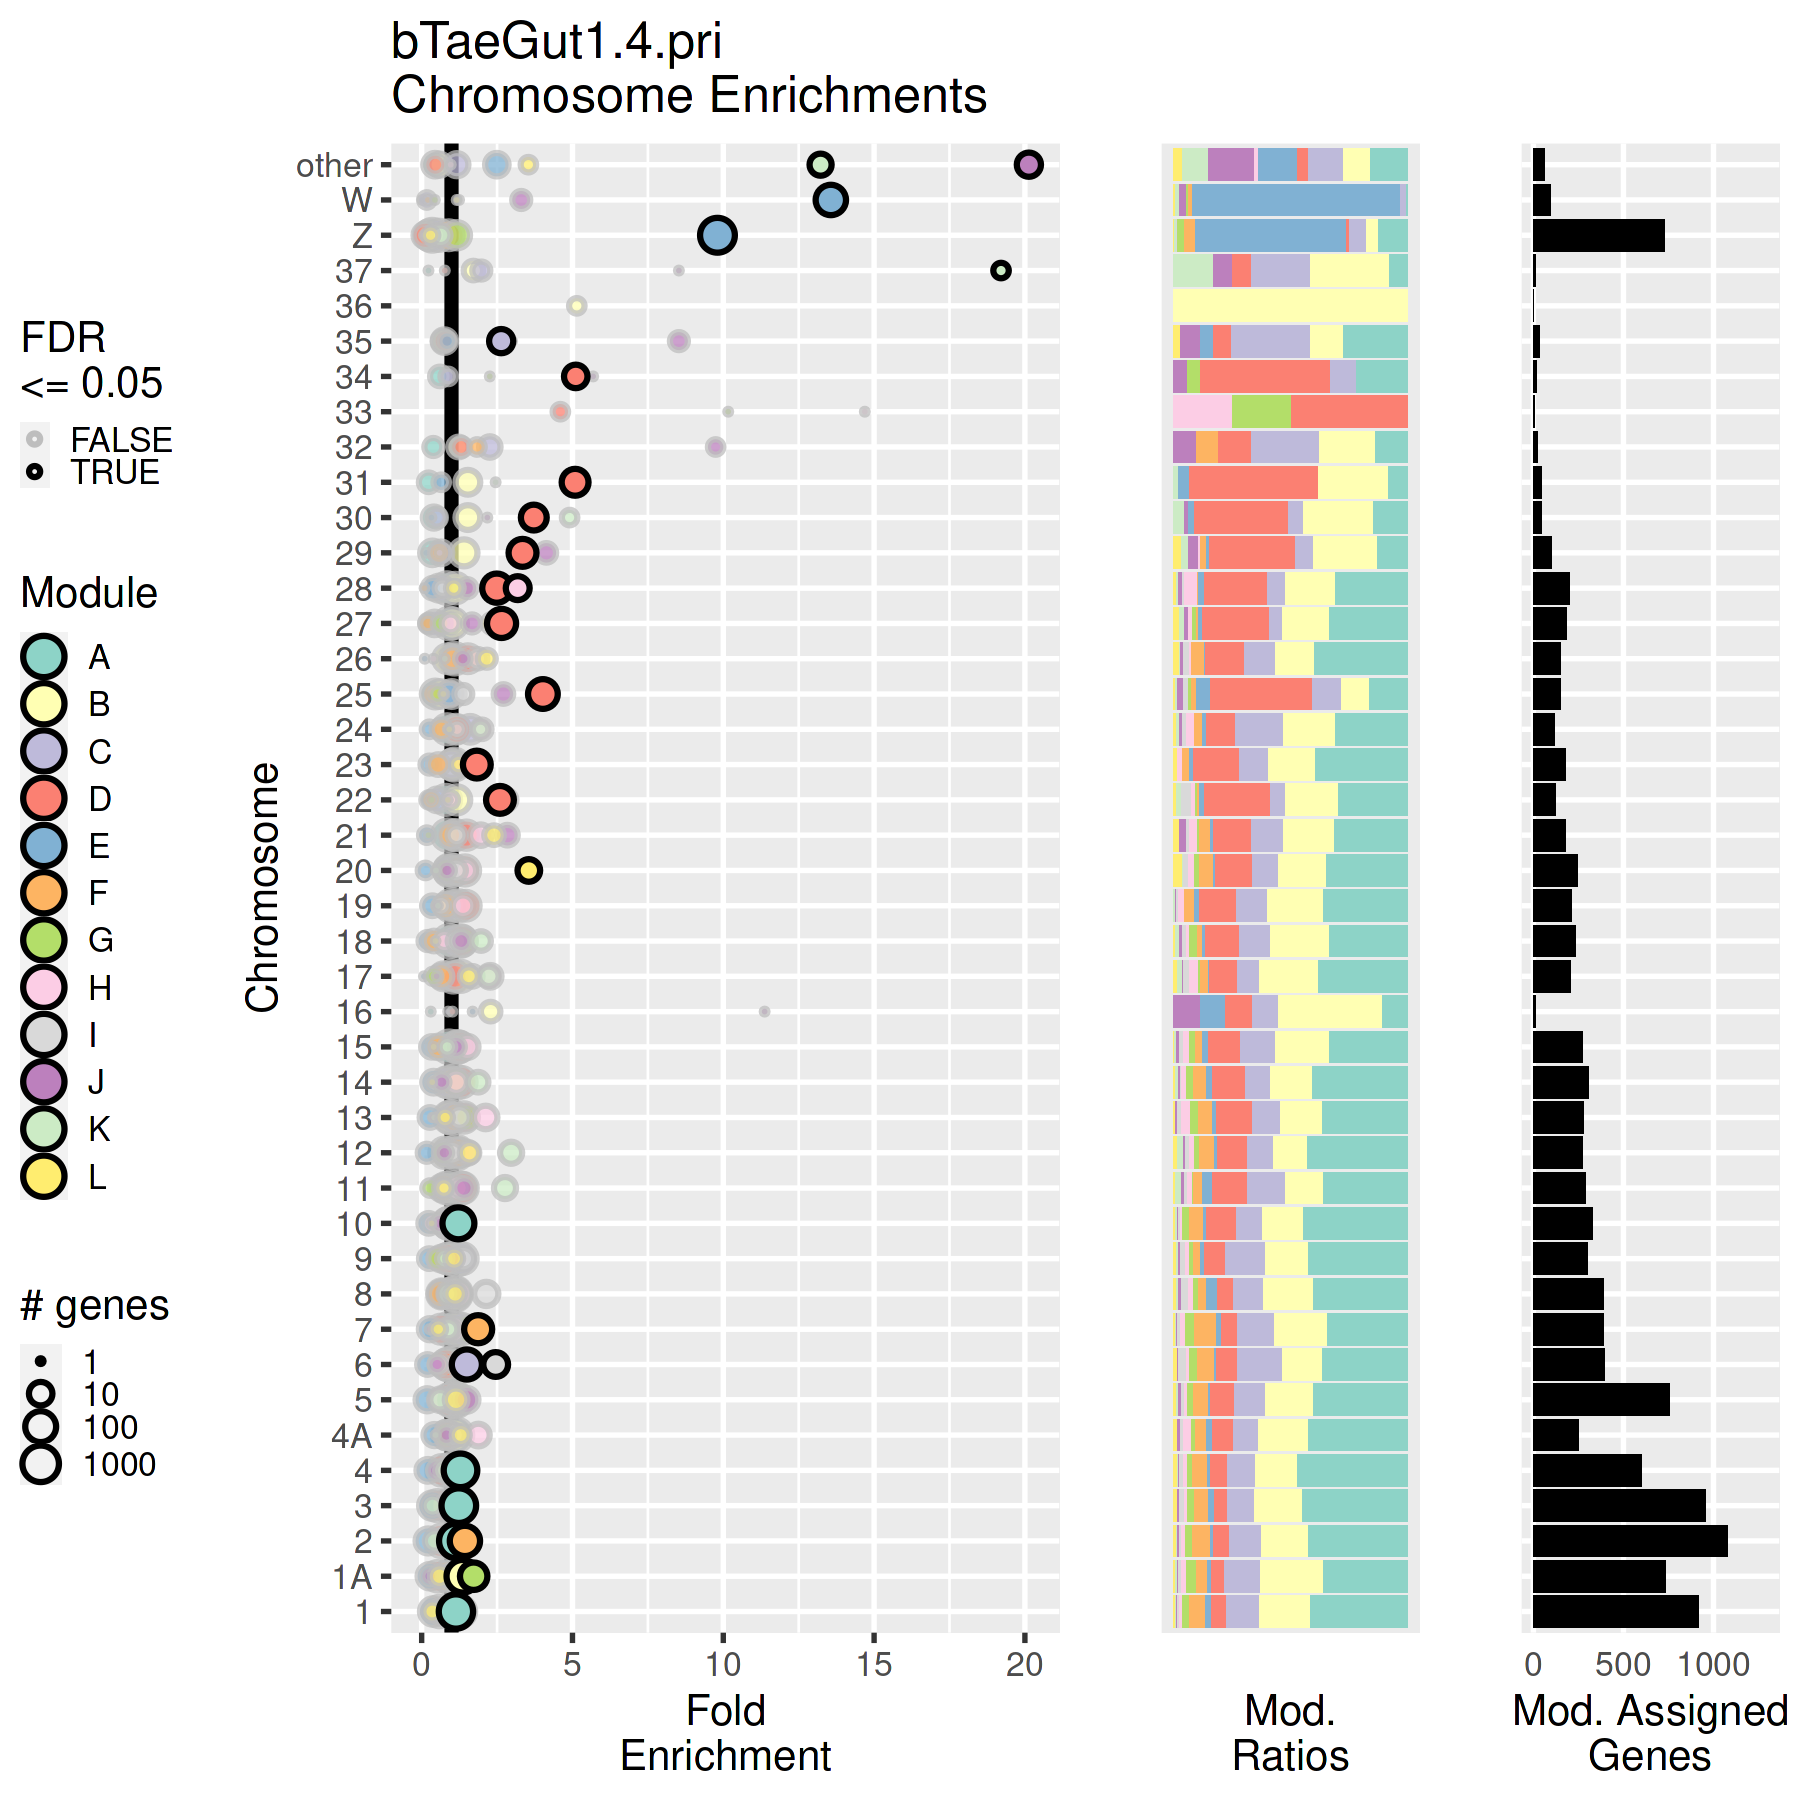

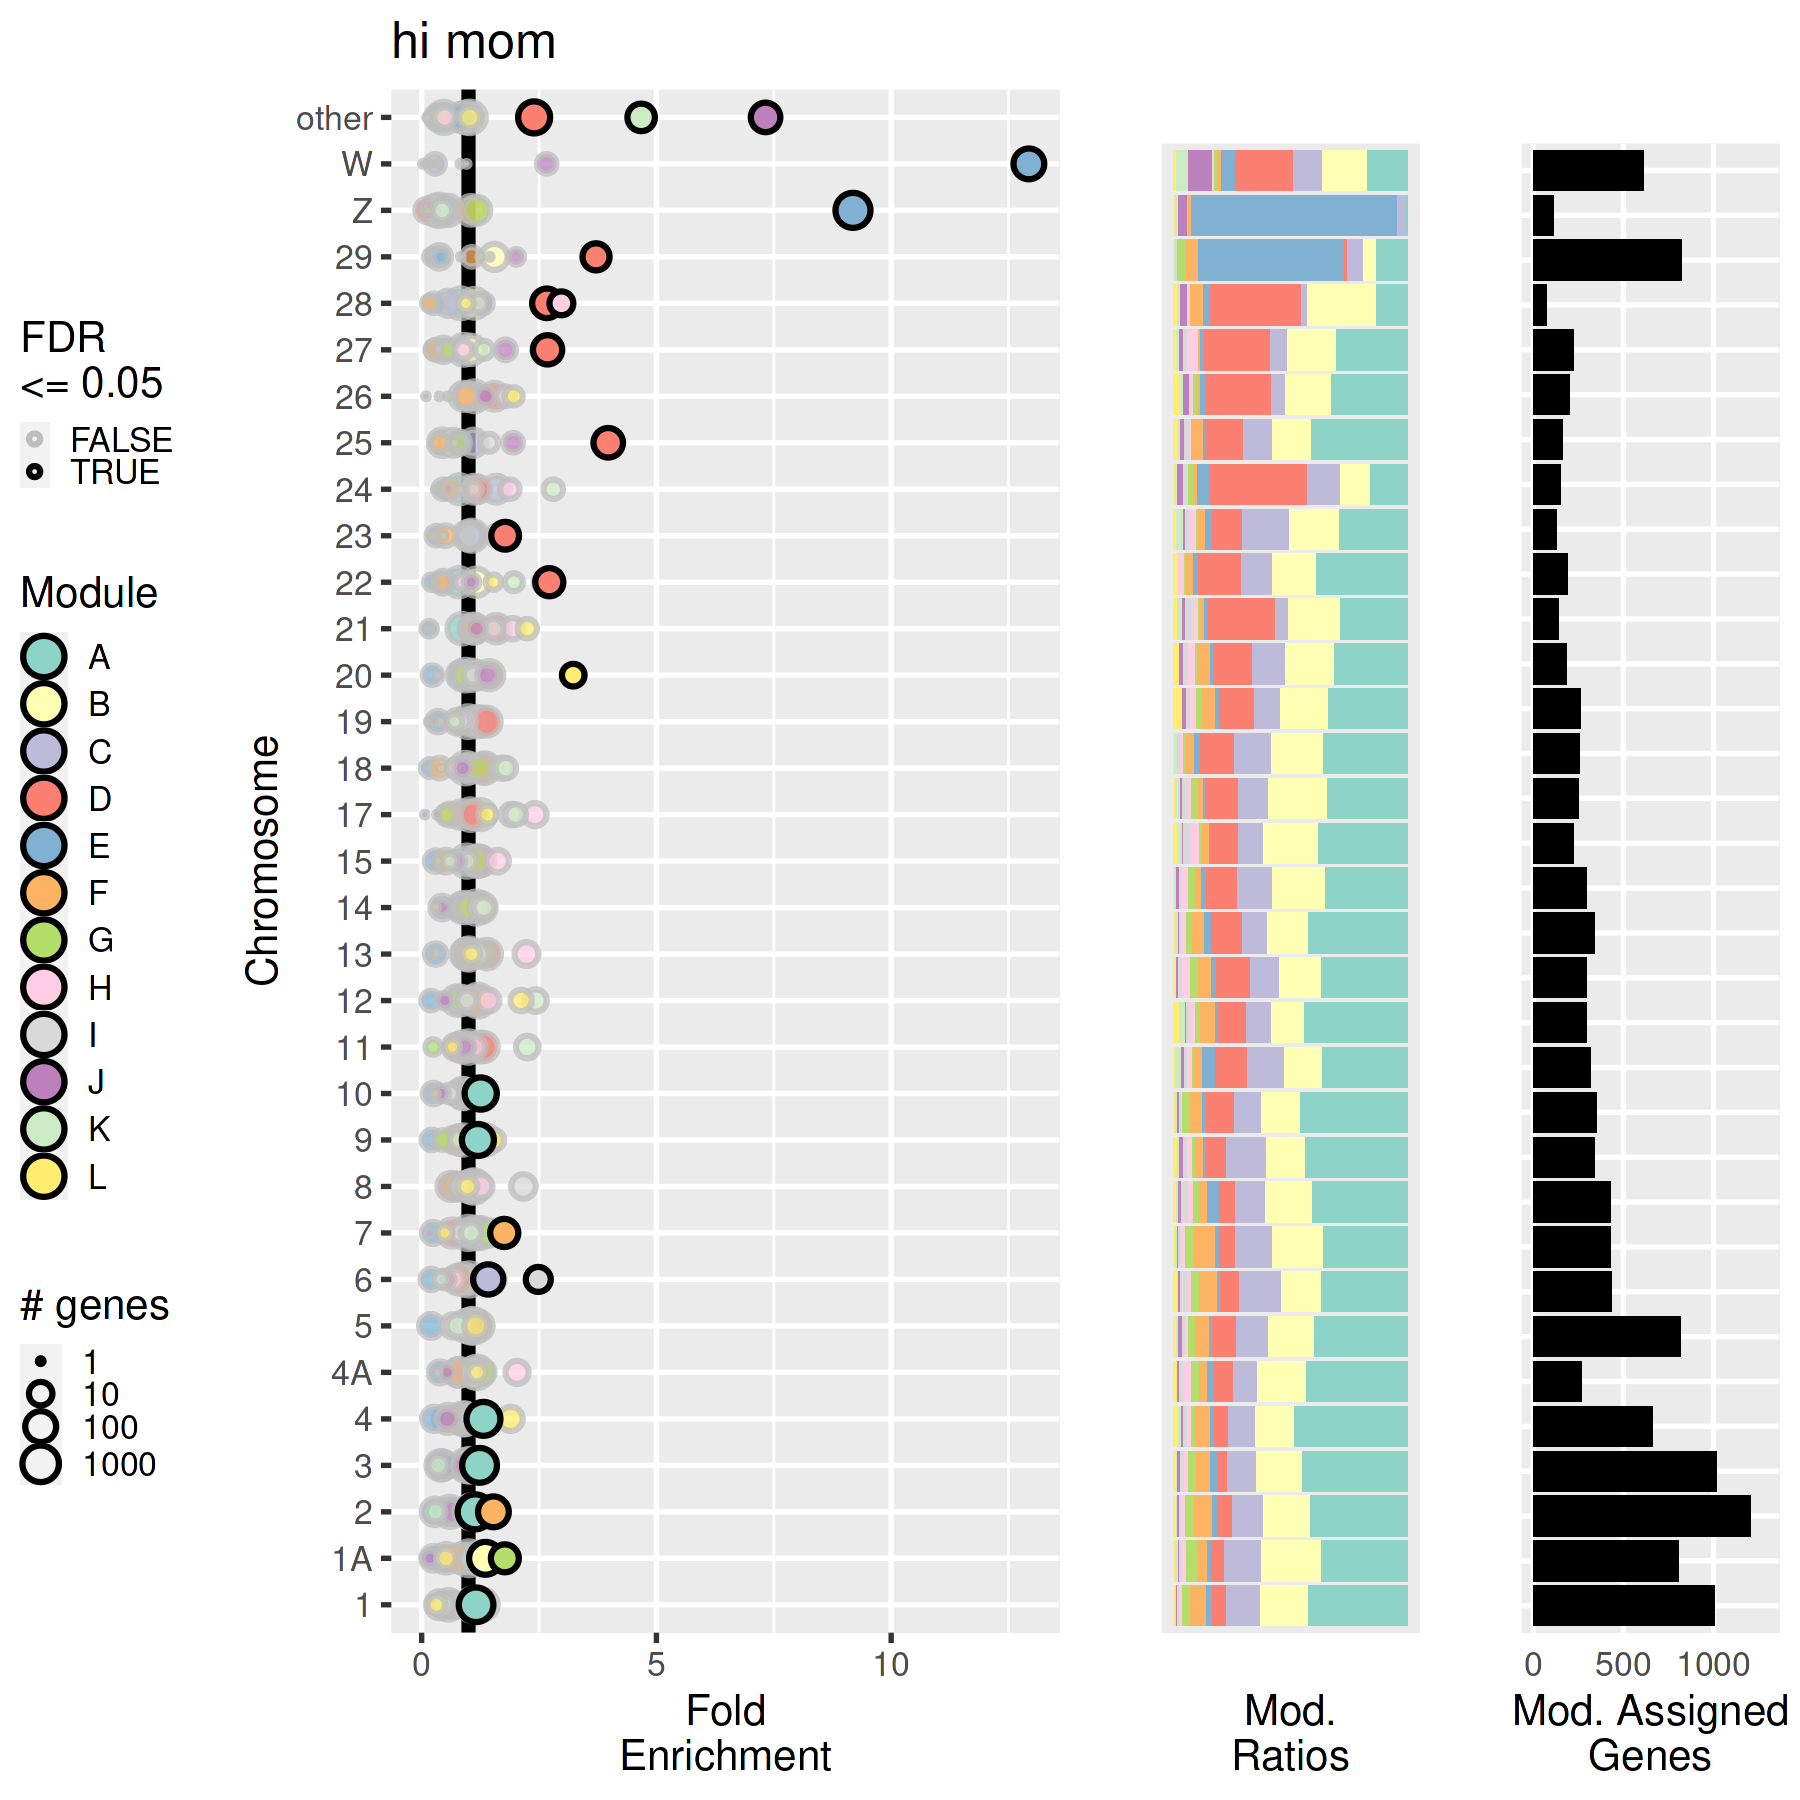

In [19]:

new_enrich_plt <- enrich_plotter(new_enrich_mut,
               new_enrich_bar_tbl,
               length(chr_convert_tbl$gene_id),
               'bTaeGut1.4.pri\nChromosome Enrichments')
new_enrich_plt
ggsave(file='svg_files/new_enrich_plt.svg',plot=new_enrich_plt, width = 15, height = 15)                     
                      
old_enrich_plt <- enrich_plotter(old_enrich_mut,
               old_enrich_bar_tbl,
               13275,
               'hi mom')
old_enrich_plt
ggsave(file='svg_files/old_enrich_plt.svg',plot=old_enrich_plt, width = 15, height = 15)            


In [20]:
new_enrich_mut %>% filter(me_assigned=='L')

X,new_chr,me_assigned,expected_freq,observed_freq,observed_enrich,p,chr,chr_name,q,pBH,pBonf,is_sig
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<lgl>
11,NC_044211.2,L,7.150124e-04,0.0002527167,0.3534438,0.98309,NC_044211.2,1,1.0000000,1.0000000,389.30364,FALSE
23,NC_044212.2,L,5.706048e-04,0.0003369556,0.5905236,0.86633,NC_044212.2,1A,1.0000000,1.0000000,343.06668,FALSE
35,NC_044213.2,L,8.391248e-04,0.0008423890,1.0038901,0.47980,NC_044213.2,2,1.0000000,1.0000000,190.00080,FALSE
47,NC_044214.2,L,7.454550e-04,0.0009266279,1.2430366,0.22208,NC_044214.2,3,0.8004664,0.8004664,87.94368,FALSE
59,NC_044215.2,L,4.683487e-04,0.0005896723,1.2590455,0.25566,NC_044215.2,4,0.8477147,0.8477147,101.24136,FALSE
71,NC_044216.2,L,1.951453e-04,0.0002527167,1.2950182,0.30429,NC_044216.2,4A,0.8970028,0.8970028,120.49884,FALSE
83,NC_044217.2,L,5.909000e-04,0.0006739112,1.1404828,0.33310,NC_044217.2,5,0.9484881,0.9484881,131.90760,FALSE
95,NC_044218.2,L,3.091101e-04,0.0004211945,1.3626033,0.23790,NC_044218.2,6,0.8134357,0.8134357,94.20840,FALSE
107,NC_044219.2,L,3.052072e-04,0.0001684778,0.5520112,0.79386,NC_044219.2,7,1.0000000,1.0000000,314.36856,FALSE


## Ok, lets look at E continuously and pull out the sex chromsomes

In [21]:
E_tbl <- g_mem %>% ungroup %>% dplyr::select(E,gene_id, me_assigned, chr) %>%
    mutate(is_w=chr=='NC_045028.1') %>%
    mutate(is_z=chr== 'NC_045027.1')

E_tbl$sex_chromosome = map2(E_tbl$is_w,E_tbl$is_z,function(.x,.y){
    if (!.x & !.y) {
        return('somatic')
    }else if (.x){
        return('W')
    }else if (.y){
        return('Z')
    }
}) %>% unlist %>% as.factor


Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”


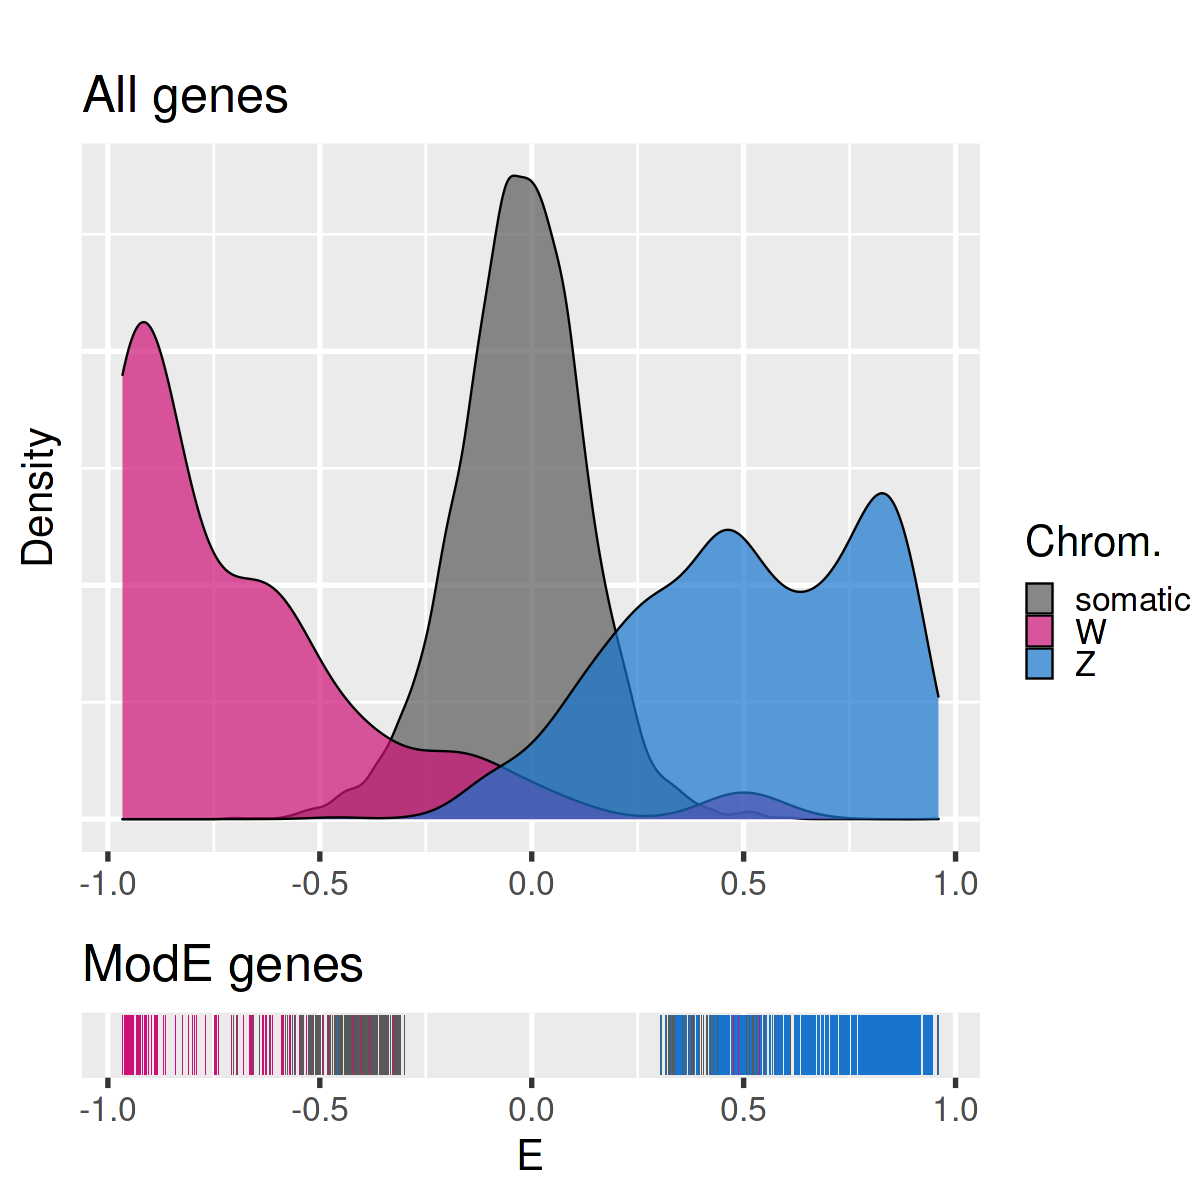

In [50]:
e_plt<-E_tbl %>% 
    ggplot(aes(x=E, fill=sex_chromosome, group= sex_chromosome)) + 
    geom_density(alpha=.7) + theme_grey(base_size=25) +
    scale_fill_manual('Chrom.',values = c('grey35','deeppink3','dodgerblue3')) + 
    ylab('Density') +ggtitle('\nAll genes')+
    theme(axis.text.y=element_blank(),
          axis.ticks.y=element_blank(),
          axis.title.x=element_blank())
e_lgnd <- g_legend(e_plt)
e_plt <- e_plt +theme(legend.position='none')

e_plt2<- E_tbl %>% filter(me_assigned == 'E') %>%  
    ggplot(aes(x=E,y=1,color=sex_chromosome,fill=sex_chromosome)) + geom_tile() +
    theme_grey(base_size=25) + 
    scale_fill_manual('Chrom.',values = c('grey35','deeppink3','dodgerblue3')) +
    scale_color_manual('Chrom.',values = c('grey35','deeppink3','dodgerblue3')) +
    theme(axis.text.y=element_blank(),
          axis.ticks.y=element_blank(),
          panel.grid.major.y = element_blank(),
          panel.grid.minor.y = element_blank(),legend.position='none') + 
    ylab('') + ggtitle('ModE genes')

options(repr.plot.width=10, repr.plot.height=10)

a<-ggarrange(e_plt,e_plt2,nrow=2,heights = c(1,.3))
b <- ggarrange(a,e_lgnd,nrow=1,widths = c(1,.2))
b
ggsave('svg_files/sex_chromosome_Edensity.svg',plot=b,height = 10,width=10)

## I'd love to take a look a the interaction of MEG E and MEG G in the gene space.

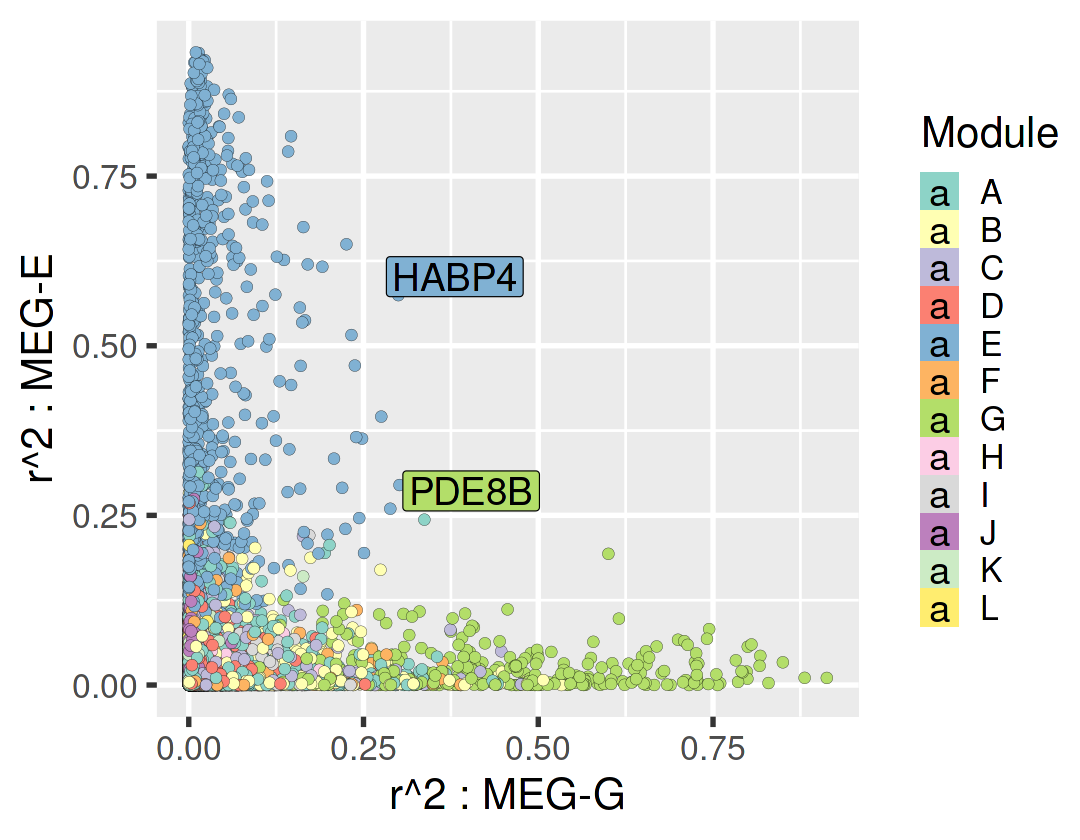

In [23]:
options(repr.plot.width=9, repr.plot.height=7)
e_vs_g<- g_mem %>%ungroup() %>% dplyr::select(E,G,gene_id,me_assigned) %>% 
    ggplot(aes(x=G^2,y=E^2, fill=me_assigned)) +
    geom_point(shape=21,stroke=.1,size=3) +
    geom_label(data=g_mem %>%ungroup() %>% dplyr::select(E,G,gene_id,me_assigned) %>% filter(.375<G^2) %>% filter(.25<E^2),
                   aes(label=gene_id),size=8)+
    theme_grey(base_size=25)+
    scale_fill_brewer('Module',palette = 'Set3')+
    xlab('r^2 : MEG-G') + ylab('r^2 : MEG-E')
e_vs_g
ggsave(file='svg_files/fig2_interactions_new.svg',plot=e_vs_g, width = 9, height = 7)

# Reviewers think that it would be interesting to look at sex chromosome gene expression independent of vocal learning. I completely agree, didn't do it before only for the sake of keeping the story as "straight forwards as possible lololol

# lets start with the fpkm matrix sub set to the sex chromosomes. I don't think this will be a WGCNA analysis.

## only want vehicle treated surounds, none of that fancy schmancy vocal learning and estrogen stuff. 

In [24]:
chr_convert_tbl_no_me <- annot %>% mutate(old_chr=chr) %>% mutate(chr=NULL)
chr_convert_tbl_no_me <- chr_convert_tbl_no_me %>%
    filter(gene_id %in% newer_annot$gene_id) %>% left_join(newer_annot,by='gene_id') 
chr_convert_tbl_no_me

gene_id,start.x,old_chr,start.y,new_chr
<chr>,<int>,<fct>,<int>,<fct>
DCAF8,4,NW_022611518.1,1411648,NC_044237.2
PES1,4,NW_022611617.1,1252138,NC_044227.2
MCL1,5,NW_022611516.1,1258760,NC_044237.2
LOC115492023,5,NW_022611588.1,968567,NC_054763.1
SMTNL2,6,NC_045017.1,5595,NC_044231.2
CLU,6,NW_022611502.1,1066757,NC_044214.2
LOC115493107,7,NC_045020.1,1995332,NC_054767.1
LOC115492069,7,NW_022611553.1,1293042,NC_054763.1
LOC115492621,7,NW_022611597.1,482295,NC_054764.1


In [25]:
nets <- readRDS('1_wgcna_recut_nets.rds')
fpkm <- nets$input_data$fpkm %>% as_tibble(rownames='sample_id')

hana_design <- read.csv('hana_variables_by_sample.csv', header=TRUE, stringsAsFactors=FALSE)

#remove those samples I had to remove before
hana_design <- hana_design %>% filter(!sample_id %in% c("fv_ra_2", "mv_hvc_1")) %>% as_tibble

In [26]:
fpkm <- fpkm %>% pivot_longer(-one_of('sample_id'),
                              names_to='gene_id',
                              values_to='fpkm')

In [27]:
fpkm <- left_join(hana_design,fpkm,by='sample_id')
head(fpkm)

sample_id,animal,sex,dose,pallia,region,song_capable,node,song_system,gene_id,fpkm
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
fe_hvc_1,a,f,e,nido,hvc,y,dn,y,A1CF,0.0171736
fe_hvc_1,a,f,e,nido,hvc,y,dn,y,A2M,7.1346124
fe_hvc_1,a,f,e,nido,hvc,y,dn,y,A4GNT,0.0000000
fe_hvc_1,a,f,e,nido,hvc,y,dn,y,AAAS,8.5950316
fe_hvc_1,a,f,e,nido,hvc,y,dn,y,AACS,57.9439117
fe_hvc_1,a,f,e,nido,hvc,y,dn,y,AADAC,0.0986940


In [28]:
w_tbl <- chr_convert_tbl_no_me %>% filter(old_chr == 'NC_045028.1') 
w_list <- w_tbl$gene_id
w_fpkm <- fpkm %>% filter(gene_id %in% w_list) %>% mutate(is_female=(sex=='f')) %>%
    filter(song_system == 'n') %>% filter(dose=='v')
w_list <- w_list[which(w_list %in% w_fpkm$gene_id )] 
length(w_fpkm$gene_id %>% unique)

z_tbl <- chr_convert_tbl_no_me %>% filter(old_chr == 'NC_045027.1')
z_list <-z_tbl$gene_id
z_fpkm <- fpkm %>% filter(gene_id %in% z_list) %>% mutate(is_female=(sex=='f')) %>%
    filter(song_system == 'n') %>% filter(dose=='v')
z_list <- z_list[which(z_list %in% z_fpkm$gene_id )]
length(z_fpkm$gene_id %>% unique)

[1] 126

[1] 888

In [29]:
w_tbls <- list()
w_tbls$an <- w_fpkm %>% filter(node=='an') 
w_tbls$dn <- w_fpkm %>% filter(node=='dn') 
w_tbls$la <- w_fpkm %>% filter(node=='la') 
w_tbls$str <- w_fpkm %>% filter(node=='str')

w_tbls <- w_tbls %>% lapply(function(tbl){tbl %>% dplyr::select(sample_id,gene_id,fpkm,is_female) %>% 
                                          pivot_wider(names_from = gene_id, values_from = fpkm)})

z_tbls <- list()
z_tbls$an <- z_fpkm %>% filter(node=='an') 
z_tbls$dn <- z_fpkm %>% filter(node=='dn') 
z_tbls$la <- z_fpkm %>% filter(node=='la') 
z_tbls$str <- z_fpkm %>% filter(node=='str')

z_tbls <- z_tbls %>% lapply(function(tbl){tbl %>% dplyr::select(sample_id,gene_id,fpkm,is_female) %>% 
                                          pivot_wider(names_from = gene_id, values_from = fpkm)})

In [30]:
library(WGCNA)
w_res_tbls <- w_tbls %>% lapply(function(tbl){
    cor_list <- w_list %>% lapply(function(id){
        corAndPvalue(x=tbl[[id]],y=tbl$is_female, alternative='greater') %>% 
        unlist %>% as.data.frame %>% t %>% as_tibble %>% mutate(gene_id=id)  
    })

    cor_list %>% purrr::reduce(rbind) %>% drop_na %>% arrange(p) %>% mutate(q=p.adjust(p,method='fdr'))})

z_res_tbls <- z_tbls %>% lapply(function(tbl){
    cor_list <- z_list %>% lapply(function(id){
        corAndPvalue(x=tbl[[id]],y=tbl$is_female, alternative='less') %>% 
        unlist %>% as.data.frame %>% t %>% as_tibble %>% mutate(gene_id=id)  
    })

    cor_list %>% purrr::reduce(rbind) %>% drop_na %>% arrange(p) %>% mutate(q=p.adjust(p,method='fdr'))})

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:IRanges’:

    cor


The following object is masked from ‘package:S4Vectors’:

    cor


The following object is masked from ‘package:stats’:

    cor




In [31]:
w_plt_tbl <- names(w_res_tbls) %>% lapply(function(tbl){w_res_tbls[[tbl]] %>% 
    mutate(node=tbl)})%>%purrr::reduce(rbind) %>% mutate(is_sig=p<=0.05)
z_plt_tbl <- names(z_res_tbls) %>% lapply(function(tbl){z_res_tbls[[tbl]] %>% 
    mutate(node=tbl)})%>%purrr::reduce(rbind) %>% mutate(is_sig=p<=0.05)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”
Saving 6.99 x 7 in image



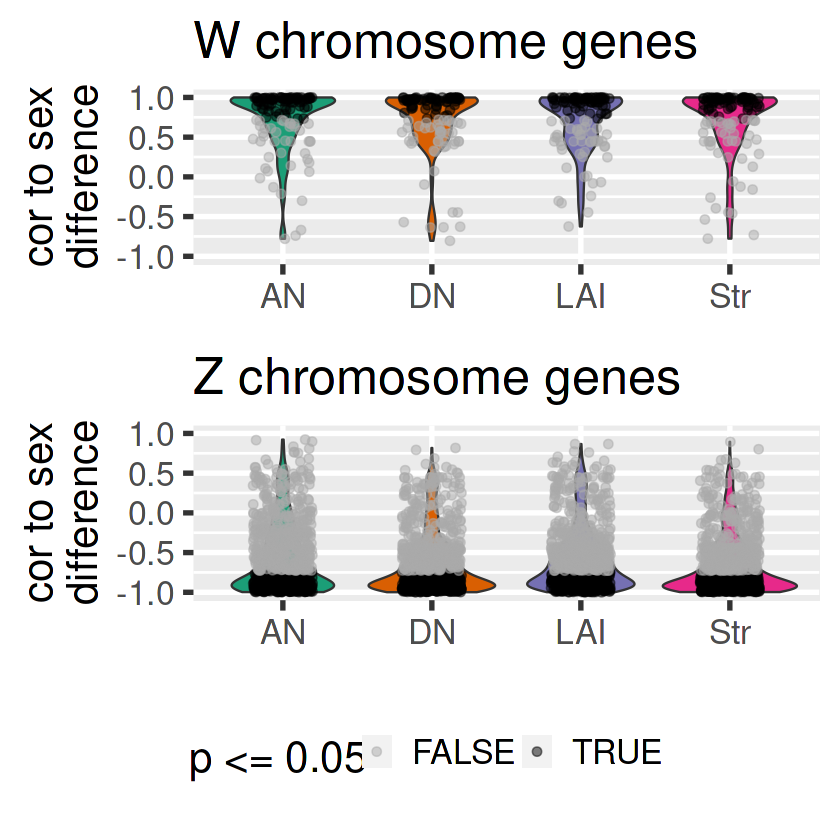

In [47]:
w_violins <- w_plt_tbl %>% ggplot(aes(x=node,y=cor, fill= node)) + 
    geom_violin(width=.7) + 
    geom_jitter(width=.2,size=2,aes(color=is_sig),alpha=.5) + 
    scale_y_continuous(breaks=c(-1,-.5,0,.5,1),limits=c(-1,1)) + xlab('') + 
    ylab('cor to sex\ndifference') +
    scale_fill_brewer(palette='Dark2') + 
    scale_color_manual(name='p <= 0.05',values=c('darkgrey','black')) + scale_x_discrete(labels=c('AN','DN','LAI','Str'))+
    theme_grey(base_size=25) +theme(legend.position='none',axis.title.x=element_blank()) +ggtitle('W chromosome genes')

z_violins <- z_plt_tbl %>% ggplot(aes(x=node,y=cor, fill= node)) + 
    geom_violin() + 
    geom_jitter(width=.2,size=2,aes(color=is_sig),alpha=.5) + 
    scale_y_continuous(breaks=c(-1,-.5,0,.5,1),limits=c(-1,1)) + xlab('')+ylab('cor to sex\ndifference') +
    scale_fill_brewer(palette='Dark2') +
    scale_color_manual('p <= 0.05',values=c('darkgrey','black')) + 
    scale_x_discrete(labels=c('AN','DN','LAI','Str'))+
    theme_grey(base_size=25) + theme(legend.position='bottom',axis.title.x=element_blank()) +
    ggtitle('Z chromosome genes') + guides(fill=FALSE)

lgnd <- g_legend(z_violins)

z_violins <- z_violins + theme(legend.position='none')


options(repr.plot.width=7, repr.plot.height=7)
right <- ggarrange(w_violins,z_violins,lgnd,nrow=3,heights = c(1,1,.5))
right
ggsave('svg_files/sex_chromosome_violins.svg',plot=right)

## Now for venn diagrams and a word cloud

In [33]:
w_sig_tbls <- w_res_tbls %>% lapply(function(tbl){
    tmp <-tbl%>% filter(p<=.05)
    tmp$gene_id})

z_sig_tbls <- z_res_tbls %>% lapply(function(tbl){
    tmp <-tbl %>% filter(p<=.05) 
    tmp$gene_id})

In [34]:
w_intersect <- w_sig_tbls %>% purrr::reduce(intersect) 
z_intersect <- z_sig_tbls %>% purrr::reduce(intersect) 

In [35]:
w_intersect %>% length
z_intersect %>% length

[1] 55

[1] 293

In [37]:
w_union <- w_sig_tbls %>% purrr::reduce(union) 
z_union <- z_sig_tbls %>% purrr::reduce(union) 

w_union %>% length
z_union %>% length

[1] 83

[1] 623

In [38]:
w_sig_tbls %>%lapply(length)
z_sig_tbls %>%lapply(length)

$an
[1] 74

$dn
[1] 66

$la
[1] 68

$str
[1] 70

$an
[1] 422

$dn
[1] 467

$la
[1] 404

$str
[1] 479

### I need to see which of my core z genes are in which of these lists.

In [39]:
core_z_genes <- core_z_venn_lists %>% purrr::reduce(intersect)
#probably already have this somewhere but whatever

z_sig_dwn_tbls %>% lapply(function(lst){lst[which(lst %in% core_z_genes)]})

ERROR: Error in is_empty(x): object 'core_z_venn_lists' not found


In [40]:
names(w_sig_tbls) <- c('AN','DN','LAI','Str')
names(z_sig_dwn_tbls) <- names(w_sig_tbls)

ERROR: Error in names(z_sig_dwn_tbls) <- names(w_sig_tbls): object 'z_sig_dwn_tbls' not found


In [42]:
library('VennDiagram')
venn.diagram(x=w_sig_tbls, filename = './fig_3_wvenn_broken_out.tiff',
             output=TRUE,fill=RColorBrewer::brewer.pal(4, "Dark2"),
             height = 2000, width = 2000)
venn.diagram(x=z_sig_tbls, filename = './fig_3_zvenn_broken_out.tiff',
             output=TRUE,fill=RColorBrewer::brewer.pal(4, "Dark2"),
             height = 2000, width = 2000)

Warning message in tiff(filename = filename, height = height, width = width, units = units, :
“type = "cairo" is unavailable. trying "Xlib"”
Warning message in grid.Call.graphics(C_polygon, x$x, x$y, list(as.integer(seq_along(x$x)))):
“semi-transparency is not supported on this device: reported only once per page”


[1] 1

Warning message in tiff(filename = filename, height = height, width = width, units = units, :
“type = "cairo" is unavailable. trying "Xlib"”
Warning message in grid.Call.graphics(C_polygon, x$x, x$y, list(as.integer(seq_along(x$x)))):
“semi-transparency is not supported on this device: reported only once per page”


[1] 1

## Some DEseq2

In [ ]:
cm <- readRDS('/v-data2/matt_davenport/hana_reanalyses/hana_cm_formatted/Count_Matrix.rds')
cm <- cm$counts
cm$gene_id <- rownames(cm)


In [ ]:
cm_long <- cm %>% pivot_longer(cols = -one_of(c('gene_id')),names_to = 'sample_id',values_to = 'count')

hana_design <- read.csv('hana_variables_by_sample.csv', header=TRUE, stringsAsFactors=FALSE)
#remove those samples I had to remove before
hana_design <- hana_design %>% filter(!sample_id %in% c("fv_ra_2", "mv_hvc_1")) %>% as_tibble

cm_long <- left_join(hana_design,cm_long,by='sample_id')
head(cm_long)

In [ ]:
w_tbl <- chr_convert_tbl %>% filter(new_chr == 'NC_045028.1') 
w_list <- w_tbl$gene_id
w_count <- cm_long %>% filter(gene_id %in% w_list) %>% mutate(is_female=(sex=='f')) %>%
    filter(song_system == 'n') %>% filter(dose=='v')
w_list <- w_list[which(w_list %in% w_count$gene_id )] 
length(w_fpkm$gene_id %>% unique)

z_tbl <- chr_convert_tbl %>% filter(new_chr == 'NC_044241.2')
z_list <-z_tbl$gene_id
z_count <- cm_long %>% filter(gene_id %in% z_list) %>% mutate(is_female=(sex=='f')) %>%
    filter(song_system == 'n') %>% filter(dose=='v')
z_list <- z_list[which(z_list %in% z_count$gene_id )]
length(z_fpkm$gene_id %>% unique)

In [ ]:
w_tbls <- list()
w_tbls$an <- w_count %>% filter(node=='an') 
w_tbls$dn <- w_count %>% filter(node=='dn') 
w_tbls$la <- w_count %>% filter(node=='la') 
w_tbls$str <- w_count %>% filter(node=='str')

w_tbls <- w_tbls %>% lapply(function(tbl){tbl %>% dplyr::select(sample_id,gene_id,count,is_female) %>% 
                                          pivot_wider(names_from = gene_id, values_from = count)})

z_tbls <- list()
z_tbls$an <- z_count %>% filter(node=='an') 
z_tbls$dn <- z_count %>% filter(node=='dn') 
z_tbls$la <- z_count %>% filter(node=='la') 
z_tbls$str <- z_count %>% filter(node=='str')

z_tbls <- z_tbls %>% lapply(function(tbl){tbl %>% dplyr::select(sample_id,gene_id,count,is_female) %>% 
                                          pivot_wider(names_from = gene_id, values_from = count)})

In [ ]:
library('DESeq2')

In [ ]:
w_tbls %>% lapply(function(tbl){

count_matrix <- tbl %>% dplyr::select(-one_of(c('sample_id','is_female'))) %>% as.matrix
rownames(count_matrix) <- tbl$sample_id
count_matrix <- count_matrix %>% t()
col_data <- tbl$is_female %>% as.matrix
rownames(col_data) <- tbl$sample_id
colnames(col_data) <- 'is_female'
dds <- DESeqDataSetFromMatrix(countData = count_matrix,
                              colData = col_data,
                              design = ~ is_female)

featureData <- data.frame(gene_id=rownames(count_matrix))
mcols(dds) <- DataFrame(mcols(dds), featureData)
keep <- rowSums(counts(dds)) >= 50
dds <- dds[keep,]
dds <- DESeq(dds)
res <- results(dds) %>% as_tibble(rownames = 'gene_id') 
res%>% ggplot(aes(y=log2FoldChange,x=1)) + geom_violin(size=3)})

In [ ]:
#res %>% ggplot(aes(x=log2FoldChange,y=-log10(pvalue), color=padj<=0.05)) + geom_point(size=3)
res %>% ggplot(aes(y=log2FoldChange,x=1)) + geom_violin(size=3)